In [24]:
import pickle
import tqdm
import polars as pl
import numpy as np
from matplotlib import pyplot as plt

experiments = []
for i in range(10):
    dfs = pickle.load(open(f"experiment{i*0.1:.1f}.p", "rb"))

    nr_reds = np.array([0]*pl.max(dfs['frame']))
    nr_total_individuals = pl.max(dfs['id'])+1

    for frame in range(max(dfs["frame"])):
        indiv = dfs[["id","x","y","image_index"]][dfs["frame"]==frame].to_numpy()
        for i,ind in enumerate(indiv):
            if ind[-1] == 1:
                nr_reds[frame] += 1
    experiments.append(nr_reds)

experiments

[array([ 1,  1,  1, ..., 50, 50, 50]),
 array([ 0,  1,  1, ..., 50, 50, 50]),
 array([ 0,  0,  0, ..., 50, 50, 50]),
 array([ 0,  0,  0, ..., 50, 50, 50]),
 array([ 0,  0,  0, ..., 33, 33, 34]),
 array([ 0,  0,  0, ..., 49, 49, 49]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

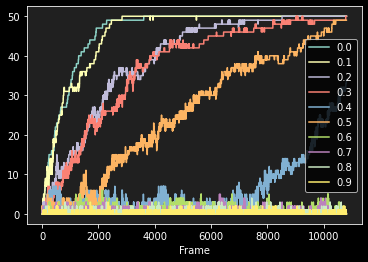

In [29]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
fig, ax = plt.subplots()

for i in range(10):
    ax.plot(np.linspace(0,len(experiments[i]),len(experiments[i])), experiments[i])
# ax.plot(range(nr_reds), moving_average(np.array(fp),60))

# ax.set_title("Percentage of Birds in a Flock over Time")
# ax.set_ylabel("Percentahe of birds in a flock")
ax.set_xlabel("Frame")
plt.legend(['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])

ax.set_facecolor("#202020")
# plt.ylim([0,1])